In [81]:
!pip install scikit-plot

In [86]:
!pip install xgboost

In [87]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score,cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy.stats import zscore

#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
filepath="https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv"
data=pd.read_csv(filepath)

In [4]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
## Finding the Missing Value
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

## There are many Columns which has Missing Value 

In [7]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


## WE will see which column of "Date" contain "Nan" values.
## We find that "Station" column also has "Nan" values.
## Both the column can be drop simultaneously

In [8]:
data.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


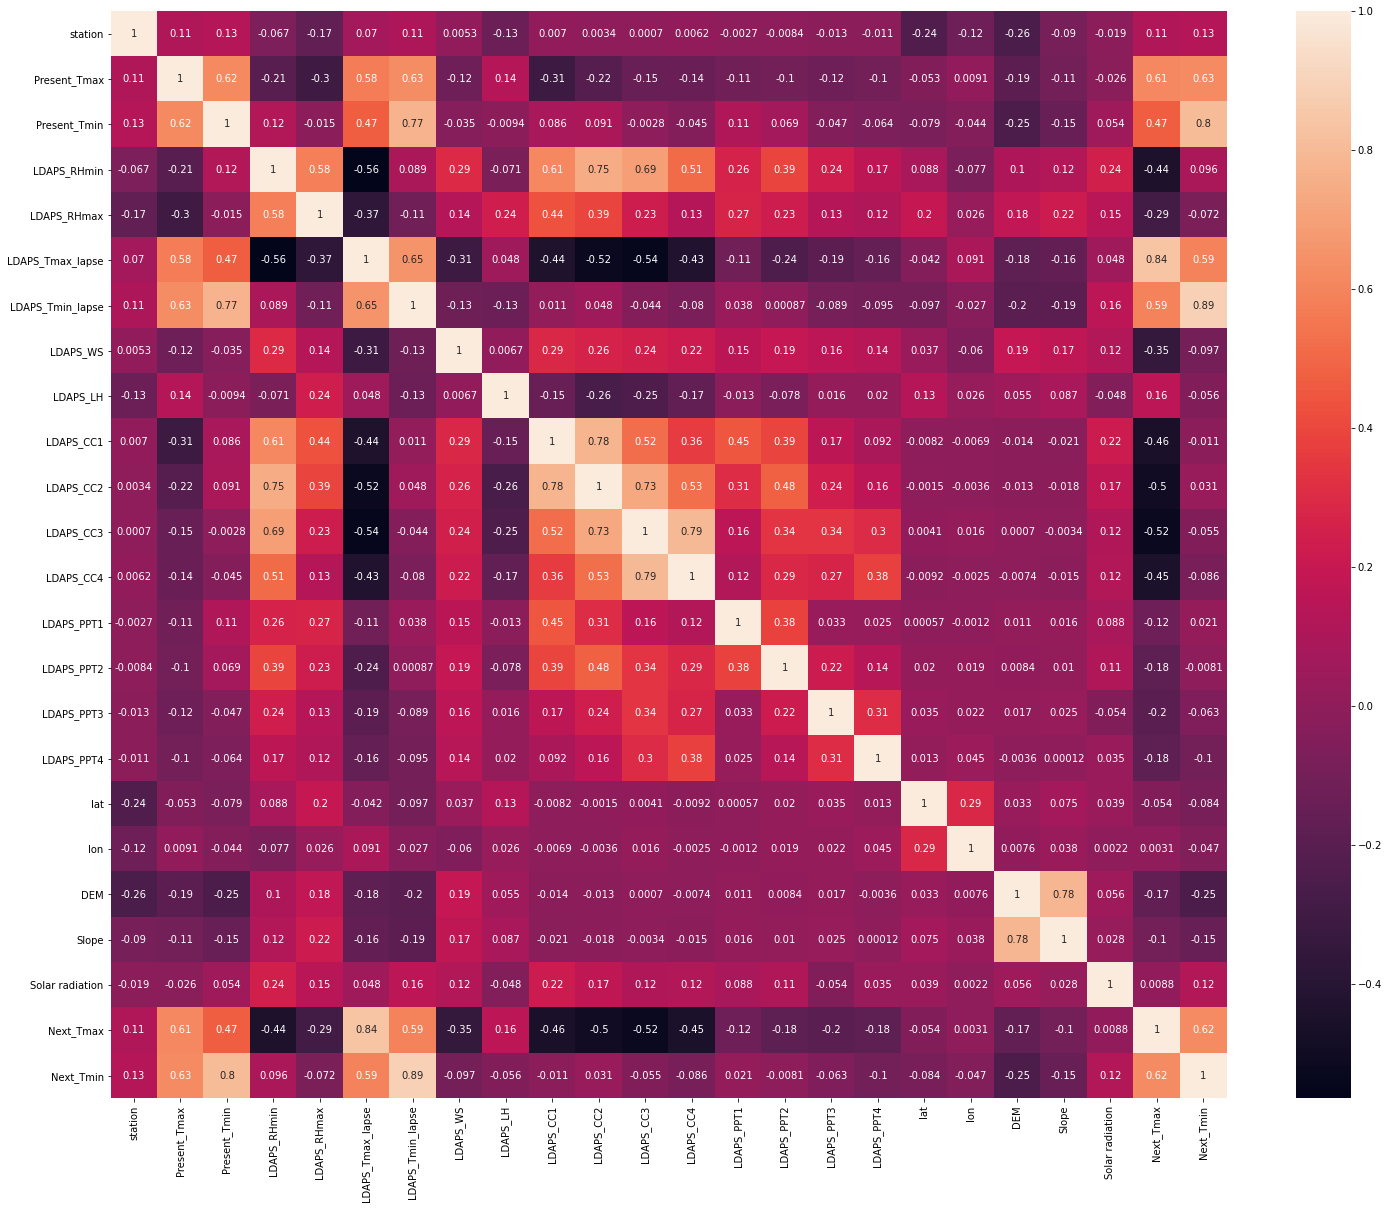

In [9]:
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Highest Correlation with the Next_Tmax is with 'Present_Tmax','LDAPS_Tmin_lapse','Present_Tmin'
## Highest Correlation with the Next_Tmin is with 'Present_Tmax','LDAPS_Tmax_lapse','Present_Tmin' and the 'LDAPS_Tmax_lapse'

## lets Impute The missing Value

In [10]:
# Impute Missing value for Present_Tmax
data['Present_Tmax'].fillna(data['Present_Tmax'].mean(),inplace=True)

# Impute Missing value for Present_Tmin
data['Present_Tmin'].fillna(data['Present_Tmin'].mean(),inplace=True)

# Impute Missing value for LDAPS_RHmin
data['LDAPS_RHmin'].fillna(data['LDAPS_RHmin'].mean(),inplace=True)

# Impute Missing value for LDAPS_RHmax
data['LDAPS_RHmax'].fillna(data['LDAPS_RHmax'].mean(),inplace=True)

# Impute Missing value for LDAPS_Tmax_lapse
data['LDAPS_Tmax_lapse'].fillna(data['LDAPS_Tmax_lapse'].mean(),inplace=True)

# Impute Missing value for LDAPS_Tmin_lapse
data['LDAPS_Tmin_lapse'].fillna(data['LDAPS_Tmin_lapse'].mean(),inplace=True)

# Impute Missing value for LDAPS_WS
data['LDAPS_WS'].fillna(data['LDAPS_WS'].mean(),inplace=True)

# Impute Missing value for LDAPS_LH
data['LDAPS_LH'].fillna(data['LDAPS_LH'].mean(),inplace=True)

# Impute Missing value for LDAPS_CC1
data['LDAPS_CC1'].fillna(data['LDAPS_CC1'].mean(),inplace=True)

# Impute Missing value for LDAPS_CC2
data['LDAPS_CC2'].fillna(data['LDAPS_CC2'].mean(),inplace=True)

# Impute Missing value for LDAPS_CC3
data['LDAPS_CC3'].fillna(data['LDAPS_CC3'].mean(),inplace=True)

# Impute Missing value for LDAPS_CC4
data['LDAPS_CC4'].fillna(data['LDAPS_CC4'].mean(),inplace=True)

# Impute Missing value for LDAPS_PPT1
data['LDAPS_PPT1'].fillna(data['LDAPS_PPT1'].mean(),inplace=True)

# Impute Missing value for LDAPS_PPT2
data['LDAPS_PPT2'].fillna(data['LDAPS_PPT2'].mean(),inplace=True)

# Impute Missing value for LDAPS_PPT3
data['LDAPS_PPT3'].fillna(data['LDAPS_PPT3'].mean(),inplace=True)

# Impute Missing value for LDAPS_PPT4
data['LDAPS_PPT4'].fillna(data['LDAPS_PPT4'].mean(),inplace=True)

# Impute Missing value for Next_Tmax
data['Next_Tmax'].fillna(data['Next_Tmax'].mean(),inplace=True)

# Impute Missing value for Next_Tmin
data['Next_Tmin'].fillna(data['Next_Tmin'].mean(),inplace=True)

In [11]:
data.isna().sum()

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

## We have successfully removed the "Missing Value" from the columns

In [12]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [13]:
## Now we will drop the "Date" and "station" columns which has less correlation

data=data.drop(columns=['Date','station'])

In [14]:
data

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


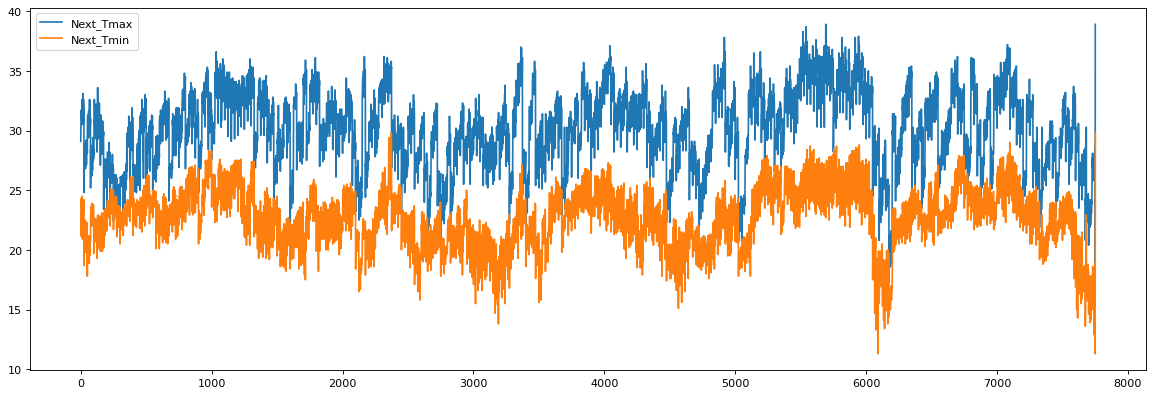

In [15]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(data["Next_Tmax"],label="Next_Tmax")
plt.plot(data["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

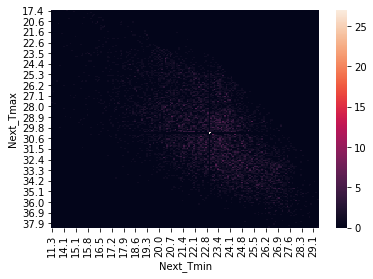

In [16]:
plt.figure()
sns.heatmap(pd.crosstab(data['Next_Tmax'],data['Next_Tmin']))
plt.show()

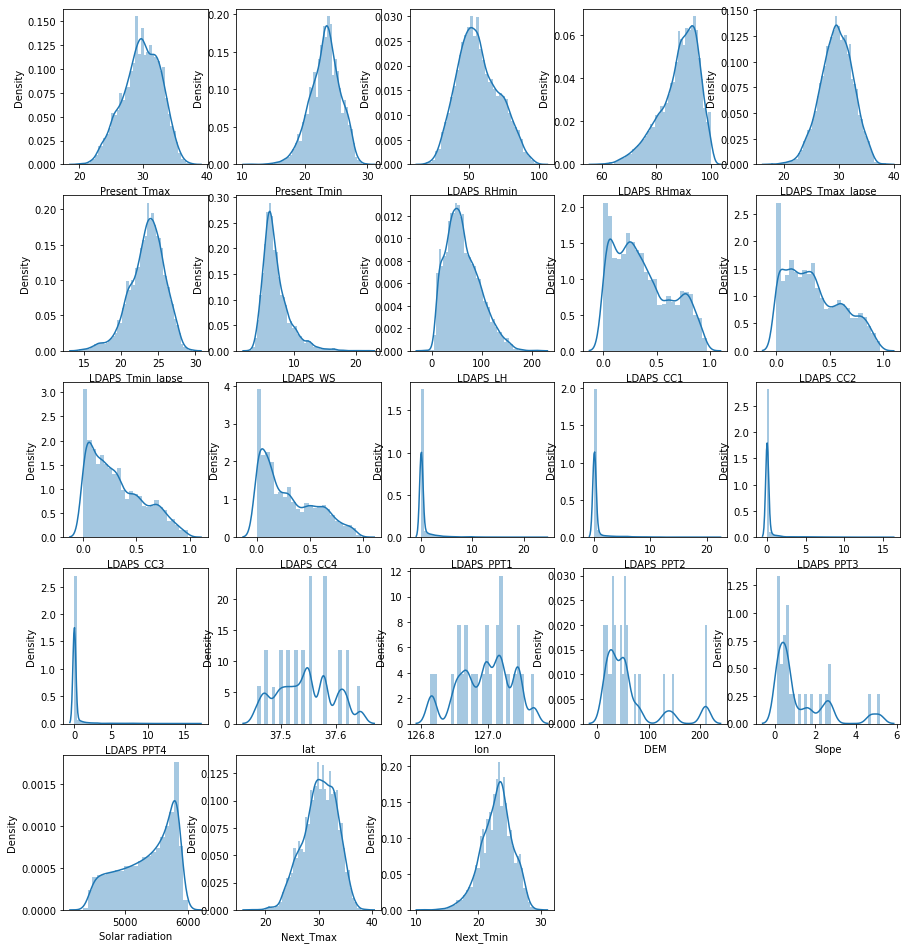

In [17]:
### Now we will visualize the data

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1


#for columns in data.columns.values:
for column in data:
    if plotnumber<=27:
        
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7752 non-null   float64
 1   Present_Tmin      7752 non-null   float64
 2   LDAPS_RHmin       7752 non-null   float64
 3   LDAPS_RHmax       7752 non-null   float64
 4   LDAPS_Tmax_lapse  7752 non-null   float64
 5   LDAPS_Tmin_lapse  7752 non-null   float64
 6   LDAPS_WS          7752 non-null   float64
 7   LDAPS_LH          7752 non-null   float64
 8   LDAPS_CC1         7752 non-null   float64
 9   LDAPS_CC2         7752 non-null   float64
 10  LDAPS_CC3         7752 non-null   float64
 11  LDAPS_CC4         7752 non-null   float64
 12  LDAPS_PPT1        7752 non-null   float64
 13  LDAPS_PPT2        7752 non-null   float64
 14  LDAPS_PPT3        7752 non-null   float64
 15  LDAPS_PPT4        7752 non-null   float64
 16  lat               7752 non-null   float64


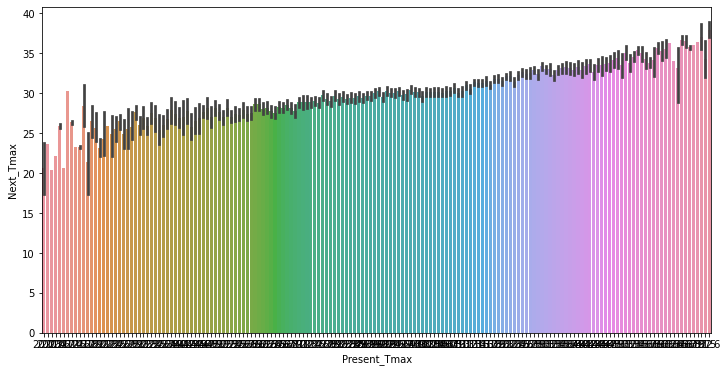

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Present_Tmax', y='Next_Tmax')
plt.show()

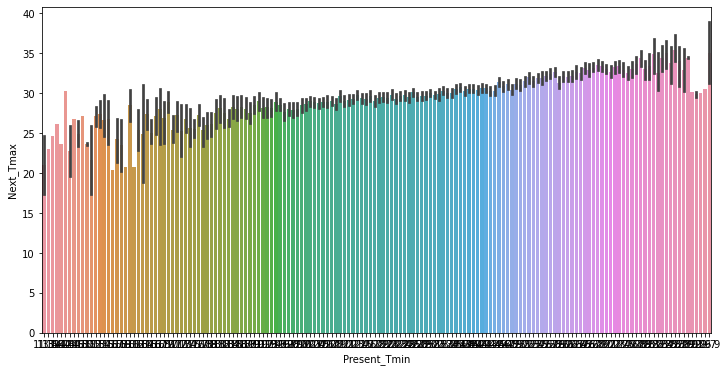

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Present_Tmin', y='Next_Tmax')
plt.show()

In [21]:
data.skew()

Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

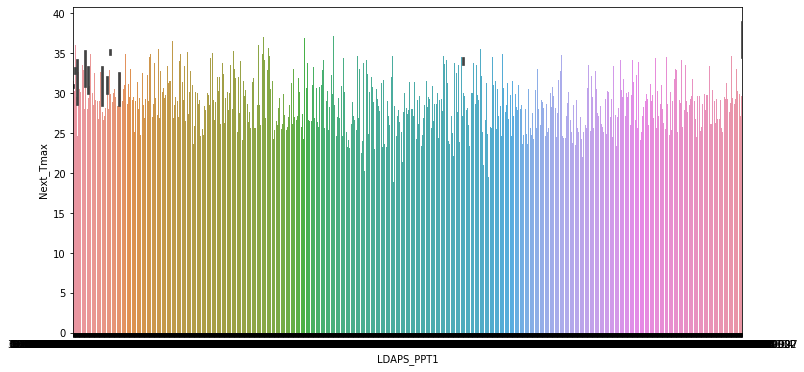

In [22]:
## WE will modity the column "LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3" and "LDAPS_PPT4" to Remove Skewness

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='LDAPS_PPT1', y='Next_Tmax')
plt.show()

## To Remove Skewness,we will apply LabelEncoder

In [24]:
for i in data.columns:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        data[i]=le.fit_transform(data[i])

In [25]:
data.skew()

Present_Tmax       -0.255546
Present_Tmin       -0.339674
LDAPS_RHmin        -0.004769
LDAPS_RHmax         0.006937
LDAPS_Tmax_lapse    0.001084
LDAPS_Tmin_lapse    0.004322
LDAPS_WS           -0.010786
LDAPS_LH           -0.006337
LDAPS_CC1          -0.004234
LDAPS_CC2          -0.004740
LDAPS_CC3          -0.006271
LDAPS_CC4          -0.003465
LDAPS_PPT1          1.351025
LDAPS_PPT2          1.514607
LDAPS_PPT3          1.605742
LDAPS_PPT4          1.922654
lat                -0.343742
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000236
Next_Tmax          -0.320070
Next_Tmin          -0.377152
dtype: float64

## Splitting the data into "X" feature and "Y_max" as the label or the vector i.e (Next_Tmax) and "Y_Min" as also the label "Next_Tmin"

In [28]:
X = data.drop(columns=["Next_Tmax","Next_Tmin"])
Y_max = data["Next_Tmax"]
Y_min = data["Next_Tmin"]

In [29]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [32]:
xd=scaler.fit_transform(X)
X=pd.DataFrame(xd,columns=X.columns)

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score

# Building the model

In [34]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=10000000000000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [35]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor']

In [36]:
def createmodels(model_list,x,y,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
#Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=5)
        
        
#Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2)*100)
        mcv.append(np.round(np.mean(score),2)*100)
    
#Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross Validation Score']=mcv
    data.set_index('Model',inplace = True)
    return data  

In [38]:
createmodels(models,X,Y_max,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,9.1590,146.1763,12.0903,81.0,56.0
SVR,11.4350,225.2203,15.0073,65.0,65.0
LinearRegression,11.8506,238.5631,15.4455,67.0,67.0
Lasso,13.7717,309.2526,17.5856,37.0,62.0
Ridge,11.8488,238.5914,15.4464,67.0,67.0
DecisionTreeRegressor,10.9231,240.4845,15.5076,76.0,45.0
RandomForestRegressor,7.2232,93.0595,9.6467,89.0,68.0
AdaBoostRegressor,13.4184,268.6183,16.3896,50.0,65.0
GradientBoostingRegressor,9.1936,141.6122,11.9001,82.0,70.0


In [39]:
createmodels(models,X,Y_min,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,6.9762,83.1145,9.1167,83.0,58.0
SVR,8.0827,112.1131,10.5883,72.0,71.0
LinearRegression,8.1947,108.6823,10.4251,78.0,75.0
Lasso,10.0317,163.8729,12.8013,49.0,68.0
Ridge,8.1966,108.6795,10.4249,78.0,75.0
DecisionTreeRegressor,8.4520,133.2859,11.5449,78.0,55.0
RandomForestRegressor,5.6670,55.0125,7.4170,90.0,77.0
AdaBoostRegressor,8.9103,121.2880,11.0131,72.0,72.0
GradientBoostingRegressor,6.5069,68.8325,8.2965,87.0,79.0


In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(X,Y_max)
print(m1.best_params_)

{'alpha': 0.1}


In [43]:
m1=Lasso(alpha=0.001)
m1.fit(X,Y_max)

Lasso(alpha=0.001)

In [44]:
importance = np.abs(m1.coef_)

In [45]:
dfcolumns = pd.DataFrame(X.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,Present_Tmax,29.130981
1,Present_Tmin,15.076710
2,LDAPS_RHmin,11.430224
3,LDAPS_RHmax,2.749202
4,LDAPS_Tmax_lapse,57.530016
5,LDAPS_Tmin_lapse,8.895471
6,LDAPS_WS,12.616422
7,LDAPS_LH,7.112298
8,LDAPS_CC1,7.553744
9,LDAPS_CC2,7.927628


In [46]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(X,Y_min)
print(m1.best_params_)

{'alpha': 0.1}


In [48]:
m1=Lasso(alpha=0.001)
m1.fit(X,Y_min)

Lasso(alpha=0.001)

In [50]:
importance = np.abs(m1.coef_)

In [51]:
dfcolumns = pd.DataFrame(X.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,Present_Tmax,14.959629
1,Present_Tmin,46.919328
2,LDAPS_RHmin,15.697792
3,LDAPS_RHmax,4.116835
4,LDAPS_Tmax_lapse,18.829680
5,LDAPS_Tmin_lapse,35.985624
6,LDAPS_WS,2.064795
7,LDAPS_LH,1.499641
8,LDAPS_CC1,1.161152
9,LDAPS_CC2,4.410395


In [53]:
createmodels(models,X,Y_min,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,6.9762,83.1145,9.1167,83.0,58.0
SVR,8.0827,112.1131,10.5883,72.0,71.0
LinearRegression,8.1947,108.6823,10.4251,78.0,75.0
Lasso,10.0317,163.8729,12.8013,49.0,68.0
Ridge,8.1966,108.6795,10.4249,78.0,75.0
DecisionTreeRegressor,8.5511,135.7905,11.6529,78.0,56.0
RandomForestRegressor,5.7332,55.9181,7.4778,89.0,77.0
AdaBoostRegressor,9.0780,123.5718,11.1163,71.0,73.0
GradientBoostingRegressor,6.5067,68.8290,8.2963,87.0,79.0


In [54]:
xtrain_max,xtest_max,ytrain_max,ytest_max=train_test_split(X,Y_max,test_size=0.25,random_state=randomstate(X,Y_max))

# Hyper-parameter Tunning

In [55]:
params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,200,
                     230, 250,265, 270, 275, 290, 300, 500,1000]}


In [56]:
g=GridSearchCV(Ridge(),params,cv=10)

In [57]:
g.fit(xtrain_max,ytrain_max)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110,
                                   150, 200, 230, 250, 265, 270, 275, 290, 300,
                                   500, 1000]})

In [58]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

Ridge(alpha=1)
{'alpha': 1}
0.7295261216191679


In [59]:
m=Ridge(alpha=0.1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [60]:
score=cross_val_score(m,X,Y_max,cv=10)

In [61]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 11.8504
Mean Squared Error is 238.5654
Root Mean Squared Error is 15.4456
R2 Score is 67.32000000000001
Mean of cross validaton Score is 61.3042


In [62]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15]}

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-2)

In [66]:
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [67]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(min_samples_split=3, n_estimators=200)
{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': None}
0.8927865228932967


In [68]:
m=RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=3,n_estimators=200)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [69]:
score=cross_val_score(m,X,Y_max,cv=10)

In [70]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 7.4368
Mean Squared Error is 99.3802
Root Mean Squared Error is 9.969
R2 Score is 87.58
Mean of cross validaton Score is 63.4512


In [71]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [72]:
g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

In [73]:
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [74]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1}
GradientBoostingRegressor(max_depth=7, n_estimators=500, subsample=0.5)
0.9186295523984602


In [75]:
m=GradientBoostingRegressor(max_depth=7, n_estimators=500, subsample=1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [76]:
score=cross_val_score(m,X,Y_max,cv=10)

In [77]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 6.2326
Mean Squared Error is 68.6197
Root Mean Squared Error is 8.2837
R2 Score is 92.02
Mean of cross validaton Score is 61.7106


In [88]:
params={
     "learning_rate"    : [0.001,0.05, 0.10 ] ,
     "max_depth"        : [ 5, 6, 8, 10, 12, 15,20,25,30],
     "min_child_weight" : [ 1, 3, 5,10],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,10],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [89]:
g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

In [91]:
xtrain_min,xtest_min,ytrain_min,ytest_min=train_test_split(X,Y_min,test_size=0.25,random_state=randomstate(X,Y_min))

In [92]:
g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_la

In [93]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'min_child_weight': 5, 'max_depth': 30, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=30,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
0.9254366793645519


In [95]:
m=XGBRegressor(colsample_bytree=0.7,gamma=0.4,learning_rate=0.1,max_depth=30, min_child_weight=5)
m.fit(xtrain_min,ytrain_min)
p=m.predict(xtest_min)

In [97]:
score=cross_val_score(m,X,Y_min,cv=10)

In [98]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 4.7929
Mean Squared Error is 40.4861
Root Mean Squared Error is 6.3629
R2 Score is 92.67
Mean of cross validaton Score is 72.8564


In [100]:
model_tmax=XGBRegressor(colsample_bytree=0.7,gamma=0.0,learning_rate=0.1,max_depth=30, min_child_weight=10)
model_tmax.fit(xtrain_max,ytrain_max)
p_tmax=model_tmax.predict(xtest_max)
score_tmax=cross_val_score(m,X,Y_max,cv=10)

In [101]:
model_tmin=XGBRegressor(colsample_bytree=0.7,gamma=0.0,learning_rate=0.1,max_depth=30, min_child_weight=10)
model_tmin.fit(xtrain_min,ytrain_min)
p_tmin=model_tmin.predict(xtest_min)
score_tmin=cross_val_score(m,X,Y_min,cv=10)

In [103]:
#Evaluation Metrics
print('Evaluation Metrics for Next Day Maximum Temperature')
print('Mean Absolute Error is',np.round(mean_absolute_error(p_tmax,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p_tmax,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p_tmax,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p_tmax,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score_tmax)*100,4))

Evaluation Metrics for Next Day Maximum Temperature
Mean Absolute Error is 6.1295
Mean Squared Error is 65.9086
Root Mean Squared Error is 8.1184
R2 Score is 92.38
Mean of cross validaton Score is 63.0407


In [104]:
print('Evaluation Metrics for Next Day Minimum Temperature')
print('Mean Absolute Error is',np.round(mean_absolute_error(p_tmin,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p_tmin,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p_tmin,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p_tmin,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score_tmin)*100,4))

Evaluation Metrics for Next Day Minimum Temperature
Mean Absolute Error is 4.6989
Mean Squared Error is 38.7915
Root Mean Squared Error is 6.2283
R2 Score is 93.0
Mean of cross validaton Score is 72.8564


Text(0.5, 1.0, 'Prediction of Minimum Temperature using Xtreme Gradient Regressor')

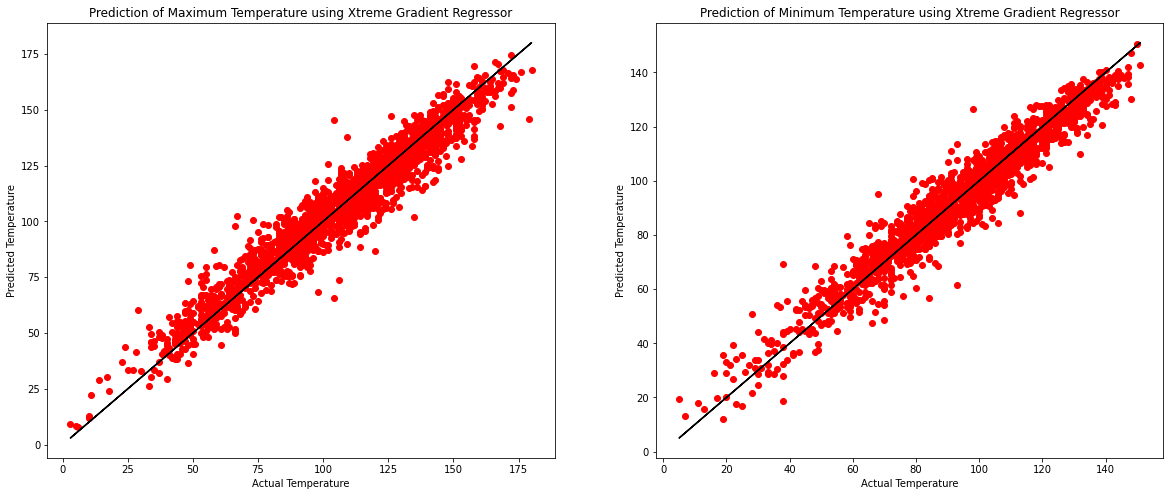

In [105]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(x=ytest_max,y=p_tmax,color='r')
plt.plot(ytest_max,ytest_max,color='k')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Prediction of Maximum Temperature using Xtreme Gradient Regressor')
plt.subplot(1,2,2)
plt.scatter(x=ytest_min,y=p_tmin,color='r')
plt.plot(ytest_min,ytest_min,color='k')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Prediction of Minimum Temperature using Xtreme Gradient Regressor')